### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df = pd.read_csv('cardio_train.csv')

FileNotFoundError: [Errno 2] File b'cardio_train.csv' does not exist: b'cardio_train.csv'

In [151]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### columns Description
* Column---Description
* age	 -----Age in days (likely needs conversion to years, as shown earlier).
* gender-----------Gender (1 or 2, possibly where 1 = female, 2 = male or vice versa).
* height	--------- Height in centimeters.
* weight	  --------  Weight in kilograms.
* ap_hi       ---------- Systolic blood pressure (higher value).
* ap_lo	         ------------- Diastolic blood pressure (lower value).
* cholesterol	--------- Cholesterol level (1 = normal, 2 = above normal, 3 = well above normal).
* gluc	    -------------  Glucose level (1 = normal, 2 = above normal, 3 = well above normal).
* smoke	      ------------  Smoking status (0 = non-smoker, 1 = smoker).
* alco	    -------------   Alcohol consumption status (0 = no, 1 = yes).
* cardio   --------------       Presence of cardiovascular disease (0 = no, 1 = yes).

In [152]:
df.shape

(70000, 13)

In [153]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [155]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [156]:
df.duplicated().any()

False

### Converting age in years

In [157]:
df['age']=(df['age']/365).astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [158]:
object_col = df.select_dtypes(include='object')
object_col
# its means no object columns 

""
0
1
2
3
4
...
69995
69996
69997
69998


### Droping useless columns

In [159]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [160]:
# To drop first lets check correlation between these columns
corr_matrix = df.corr()
heart_disease_corr = corr_matrix['cardio'].sort_values(ascending=False)
heart_disease_corr

cardio         1.000000
age            0.237985
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64

In [161]:
# drop active and id columns
columns = ['id','active']
for col in columns:
    df=df.drop(columns=[col],axis=1)


In [162]:
df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio
0,50,2,168,62.0,110,80,1,1,0,0,0
1,55,1,156,85.0,140,90,3,1,0,0,1


### Splitting Dataset into Train and Test

In [163]:
# Depentdent column
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [164]:
# import library to split the dataset
from sklearn.model_selection import train_test_split

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [166]:
print(y_train.value_counts())

0    28033
1    27967
Name: cardio, dtype: int64


### Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardScaler(X,y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.transform(y)
    return X_scaled,y_scaled

In [168]:
X_train_scaled ,X_test_scaled = standardScaler(X_train,X_test)

In [169]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(56000, 10)
(14000, 10)


# model creations

### logistic Regression

In [170]:
# importing libraries to import model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report


In [171]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
# predicting output and accuracy

pred1 = log_model.predict(X_test_scaled)
accuracy = accuracy_score(pred1,y_test)
print("Accuracy :",accuracy)
print(classification_report(y_test,pred1))

Accuracy : 0.7203571428571428
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [173]:
# Predict on the training data
train_pred = log_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)

# Predict on the test data
test_pred = log_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.7185357142857143
Test Accuracy: 0.7203571428571428


### Accuracy graph

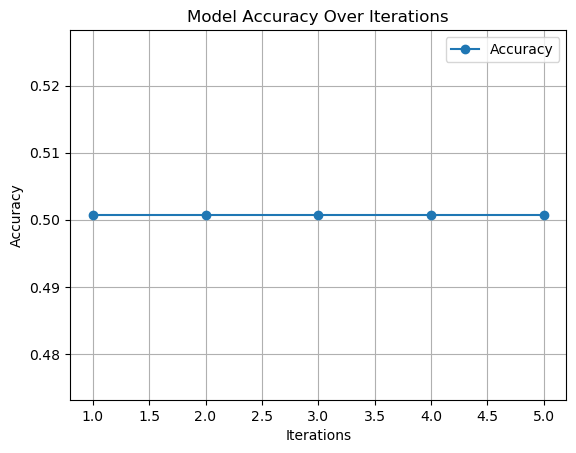

In [174]:
iterations = [1, 2, 3, 4, 5]
accuracies = []
for i in iterations:
    pred = log_model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracies.append(accuracy)

# Plot accuracy
plt.plot(iterations, accuracies, marker='o', label='Accuracy')
plt.title('Model Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
# plt.ylim(0.6, 1.0)  # Adjust based on your accuracy range
plt.grid()
plt.legend()
plt.show()

### Testing on new Data

In [220]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio
0,50,2,168,62.0,110,80,1,1,0,0,0
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0


In [212]:
new_data = pd.DataFrame([[68, 2, 180, 90, 160, 100, 3, 2, 1, 1,]])
new_data = scaler.transform(new_data)
new_data

array([[2.24313698, 1.36899713, 1.87907526, 1.08206785, 0.17652475,
        0.0342998 , 2.38445407, 1.32066877, 3.26747563, 4.38201098]])

In [224]:
pred1 = log_model.predict(new_data)
print(pred1)

[1]


### importing into pickle file

In [216]:
import pickle 


In [226]:
pickle.dump(log_model,open('heart_prediction_model','wb'))

In [227]:
pickled_model=pickle.load(open('heart_prediction_model','rb'))

In [228]:
pickled_model.predict(new_data)

array([1], dtype=int64)

### Random Forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
pred3 = rfc.predict(X_test_scaled)
accuracy = accuracy_score(pred3 , y_test)
print("Accuracy :",accuracy)

Accuracy : 0.7037857142857142


## Decision Tree

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DTC = DecisionTreeClassifier(max_depth=3)
DTC.fit(X_train_scaled,y_train)
pred2 = DTC.predict(X_test_scaled)
accuracy = accuracy_score(pred2,y_test)
print("Accuracy :",accuracy)

Accuracy : 0.7297142857142858
